<a href="https://colab.research.google.com/github/GauravKumawat33/Regression/blob/master/Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab as pl
%matplotlib inline

In [4]:
df=pd.read_csv("/content/drive/MyDrive/ML/CAR_DEKHO.csv")

In [5]:
cdf=df[['year','km_driven','selling_price']]

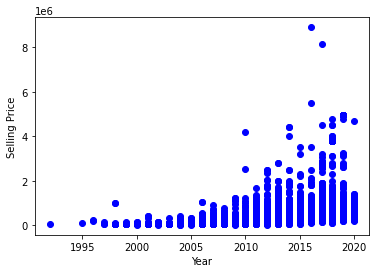

In [23]:
plt.scatter(cdf.year, cdf.selling_price,  color='blue')
plt.xlabel("Year")
plt.ylabel("Selling Price")
plt.show()

In [8]:
msk=np.random.rand(len(df))<0.8
train=cdf[msk]
test=cdf[~msk]

In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x=train[['year']]
train_y=train[['selling_price']]

test_x=test[['year']]
test_y=test[['selling_price']]

poly=PolynomialFeatures(degree=2)
train_x_poly=poly.fit_transform(train_x)
train_x_poly

array([[1.000000e+00, 2.007000e+03, 4.028049e+06],
       [1.000000e+00, 2.012000e+03, 4.048144e+06],
       [1.000000e+00, 2.017000e+03, 4.068289e+06],
       ...,
       [1.000000e+00, 2.009000e+03, 4.036081e+06],
       [1.000000e+00, 2.016000e+03, 4.064256e+06],
       [1.000000e+00, 2.016000e+03, 4.064256e+06]])

In [17]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly,train_y)

print('Coefficients: ',clf.coef_)
print("Intercept: ",clf.intercept_)

Coefficients:  [[ 0.00000000e+00 -1.29680468e+07  3.23763718e+03]]
Intercept:  [1.29856683e+10]


Text(0, 0.5, 'Selling Price')

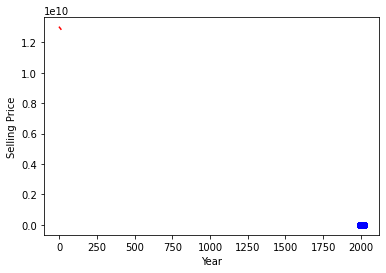

In [20]:
# ??
plt.scatter(train.year,train.selling_price,color='blue')
XX=np.arange(0.0,10.0,0.1)
yy=clf.intercept_[0]+clf.coef_[0][1]*XX+clf.coef_[0][2]*np.power(XX,2)
plt.plot(XX,yy,'-r')
plt.xlabel("Year")
plt.ylabel("Selling Price")

In [22]:
from sklearn.metrics import r2_score

test_x_poly=poly.transform(test_x)
test_y_ =clf.predict(test_x_poly)

print("Mean absolute error: %.2f" %np.mean(np.absolute(test_y_ -test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ -test_y)**2))
print("R2-score: %.2f" % r2_score(test_y,test_y_))

Mean absolute error: 246747.46
Residual sum of squares (MSE): 247541468479.78
R2-score: 0.23
